# ORB(Oriented Fast and Rotated Brief)

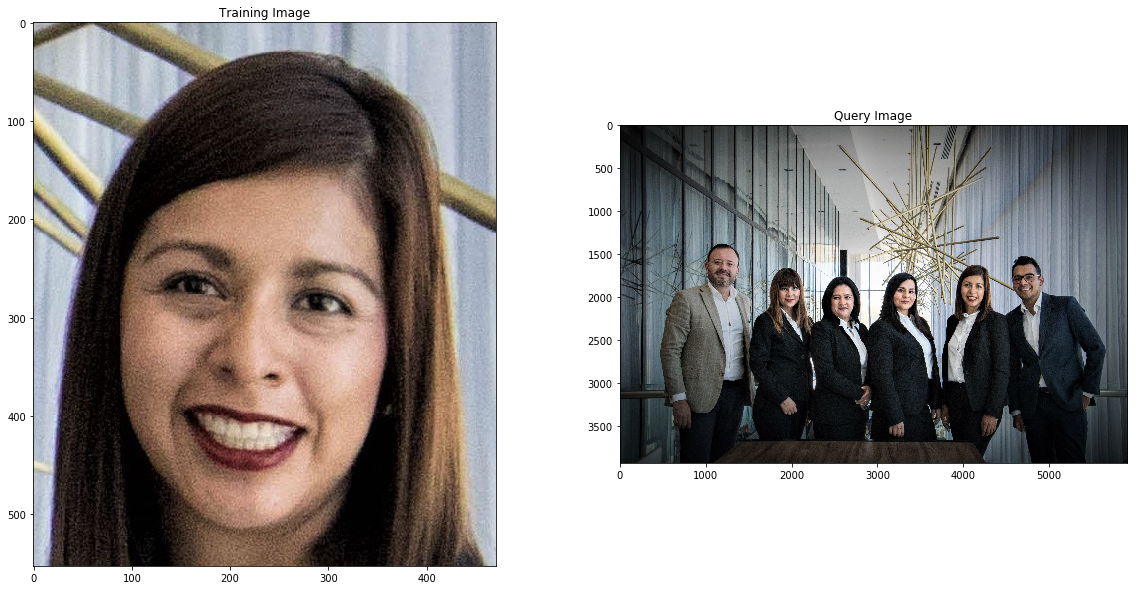

In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

plt.rcParams['figure.figsize'] = [20,10] # set the default figure size

# Train Image
image1 = cv2.imread('images/face.jpeg')

gray_train = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Query Image
image2 = cv2.imread('images/Team.jpeg')

gray_query = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

#Plot train and query images

plt.subplot(121)
plt.imshow(image1)
plt.title('Training Image')

plt.subplot(122)
plt.imshow(image2)
plt.title('Query Image')

plt.show()

Number of Keypoints:  2501


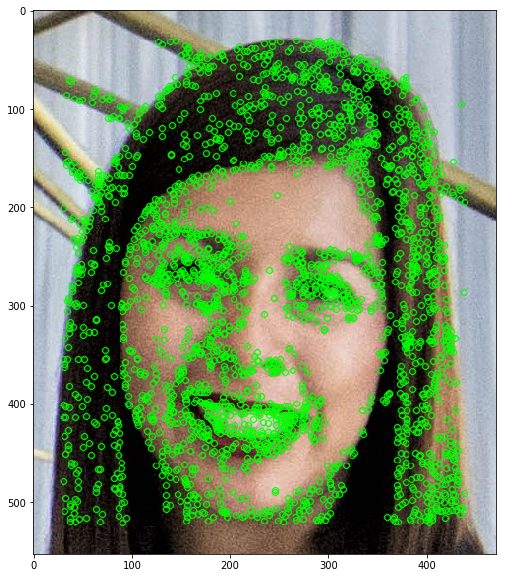

In [21]:
# Locate keypoints using ORB
orb = cv2.ORB_create(5000,2.0) # create an object of ORB Class with # keypoints = 200 & pyramid reduce factor = 2
keypoints_train, descriptor_train = orb.detectAndCompute(gray_train, None) #calculate keypoints and None stands for no Mask

train_image = np.copy(image1)

cv2.drawKeypoints(image1, keypoints_train, train_image, color=(0,255,0))

plt.imshow(train_image)

print("Number of Keypoints: ",len(keypoints_train))

Number of Keypoints:  4941


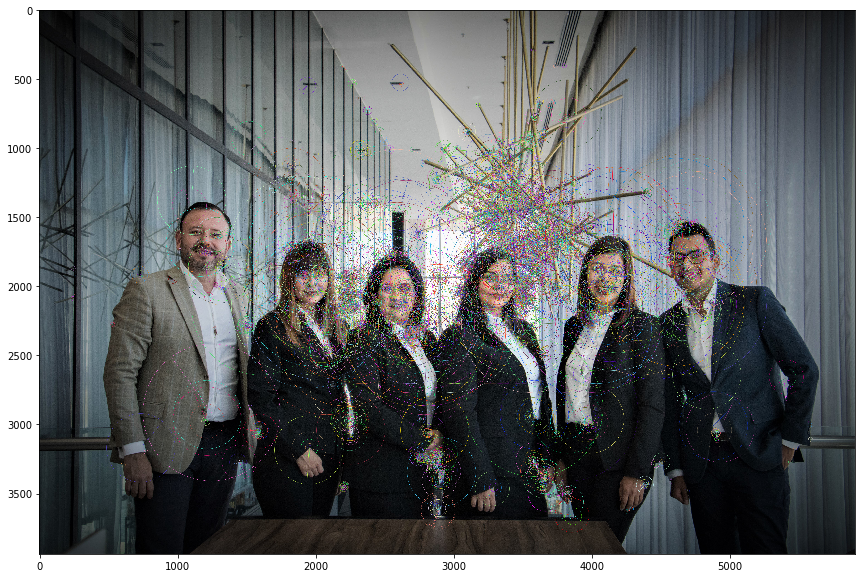

In [22]:
# Locate keypoints in query image
keypoints_query, descriptor_query = orb.detectAndCompute(gray_query,None)

query_image = np.copy(image2)

cv2.drawKeypoints(image2, keypoints_query, query_image, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(query_image)

print("Number of Keypoints: ",len(keypoints_query))

number of matching keypoints :  1575


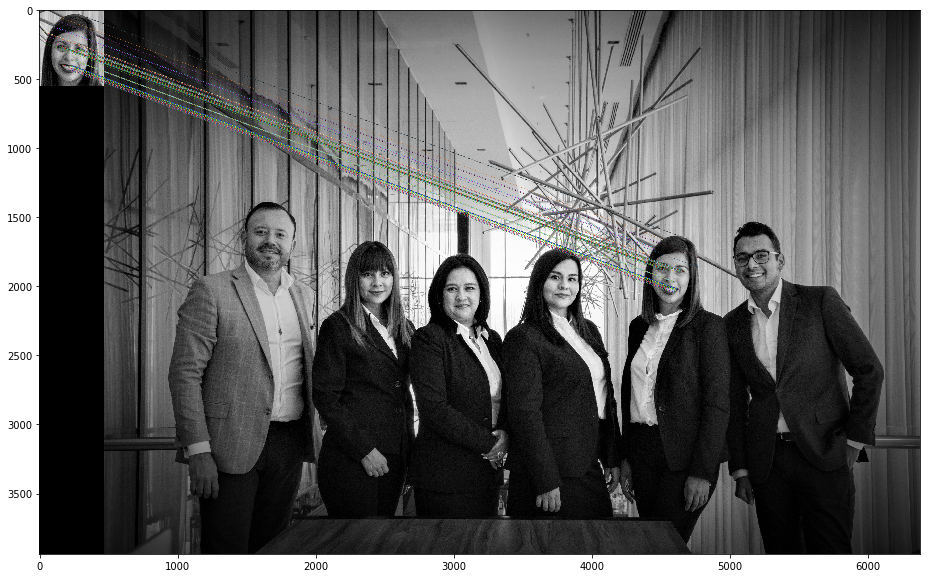

In [23]:
# Object detection
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True) #create a brute force matcher object

matches = bf.match(descriptor_train, descriptor_query) #Perform match between ORB descriptors of train and query image
matches = sorted(matches,key=lambda x:x.distance)

result = cv2.drawMatches(gray_train,keypoints_train,gray_query,keypoints_query,matches[:85],gray_query,flags=2) 

plt.imshow(result)
print("number of matching keypoints : ", len(matches))